# 

### Importing required libraries : 

In [1]:
import math
import time

import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm import tqdm
import xgboost

In [2]:
#setting a seed
np.random.seed(42)

In [3]:
pwd

'/home/yash/projects/prognostics_thesis'

In [4]:
ls -g CMAPSSData/

total 44324
-rw-rw-r-- 1 yash   434158 Oct 31 01:09 'Damage Propagation Modeling.pdf'
-rw-rw-r-- 1 yash     2442 Oct 31 01:09  readme.txt
-rw-rw-r-- 1 yash      429 Oct 31 01:09  RUL_FD001.txt
-rw-rw-r-- 1 yash     1110 Oct 31 01:09  RUL_FD002.txt
-rw-rw-r-- 1 yash      428 Oct 31 01:09  RUL_FD003.txt
-rw-rw-r-- 1 yash     1084 Oct 31 01:09  RUL_FD004.txt
-rw-rw-r-- 1 yash  2228855 Oct 31 01:09  test_FD001.txt
-rw-rw-r-- 1 yash  5734587 Oct 31 01:09  test_FD002.txt
-rw-rw-r-- 1 yash  2826651 Oct 31 01:09  test_FD003.txt
-rw-rw-r-- 1 yash  6957759 Oct 31 01:09  test_FD004.txt
-rw-rw-r-- 1 yash  3515356 Oct 31 01:09  train_FD001.txt
-rw-rw-r-- 1 yash  9082480 Oct 31 01:09  train_FD002.txt
-rw-rw-r-- 1 yash  4213862 Oct 31 01:09  train_FD003.txt
-rw-rw-r-- 1 yash 10350705 Oct 31 01:09  train_FD004.txt


In [5]:
#Loading Dataset files into the notebook: 

train_FD001 = pd.read_csv('./CMAPSSData/train_FD001.txt', sep = " ", header = None)
train_FD002 = pd.read_csv('./CMAPSSData/train_FD002.txt', sep = " ", header = None)
train_FD003 = pd.read_csv('./CMAPSSData/train_FD003.txt', sep = " ", header = None)
train_FD004 = pd.read_csv('./CMAPSSData/train_FD004.txt', sep = " ", header = None)

test_FD001 = pd.read_csv('./CMAPSSData/test_FD001.txt', sep = " ", header = None)
test_FD002 = pd.read_csv('./CMAPSSData/test_FD002.txt', sep = " ", header = None)
test_FD003 = pd.read_csv('./CMAPSSData/test_FD003.txt', sep = " ", header = None)
test_FD004 = pd.read_csv('./CMAPSSData/test_FD004.txt', sep = " ", header = None)

In [6]:
#Description of first dataset file : 
train_FD001.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


Since the last two columns are empty, they are removed from the dataset.

In [7]:
train_FD001.drop(columns = [26, 27], inplace  = True)
train_FD002.drop(columns = [26, 27], inplace  = True)
train_FD003.drop(columns = [26, 27], inplace  = True)
train_FD004.drop(columns = [26, 27], inplace  = True)

test_FD001.drop(columns = [26, 27], inplace  = True)
test_FD002.drop(columns = [26, 27], inplace  = True)
test_FD003.drop(columns = [26, 27], inplace  = True)
test_FD004.drop(columns = [26, 27], inplace  = True)

Labelling every column with the representative parameter : 

In [8]:
column_labels = ['unit_number', 'time_in_cycles', 'setting_1', 'setting_2', 'TRA', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

In [9]:
#Adding labels to all training sets :
train_FD001.columns = column_labels
train_FD002.columns = column_labels
train_FD003.columns = column_labels
train_FD004.columns = column_labels

test_FD001.columns = column_labels
test_FD002.columns = column_labels
test_FD003.columns = column_labels
test_FD004.columns = column_labels

In [10]:
train_FD001.describe()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [11]:
#deleting columns with constant values ​​that do not carry information about the state of the unit
train_FD001.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

Writing a function to prepare training set and creating an extra RUL column with information about remaining useful life :

In [12]:
def prep_train_set(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    fd_RUL.columns = ['unit_number', 'max']
    df = df.merge(fd_RUL, on = ['unit_number'], how = 'left')
    df['RUL'] = df['max'] - df['time_in_cycles']
    df.drop(columns = ['max'], inplace = True)

    return df[df['time_in_cycles'] > factor]

In [13]:
df = prep_train_set(train_FD001)

Drawing a Heatmap for all Parameters as follows : 

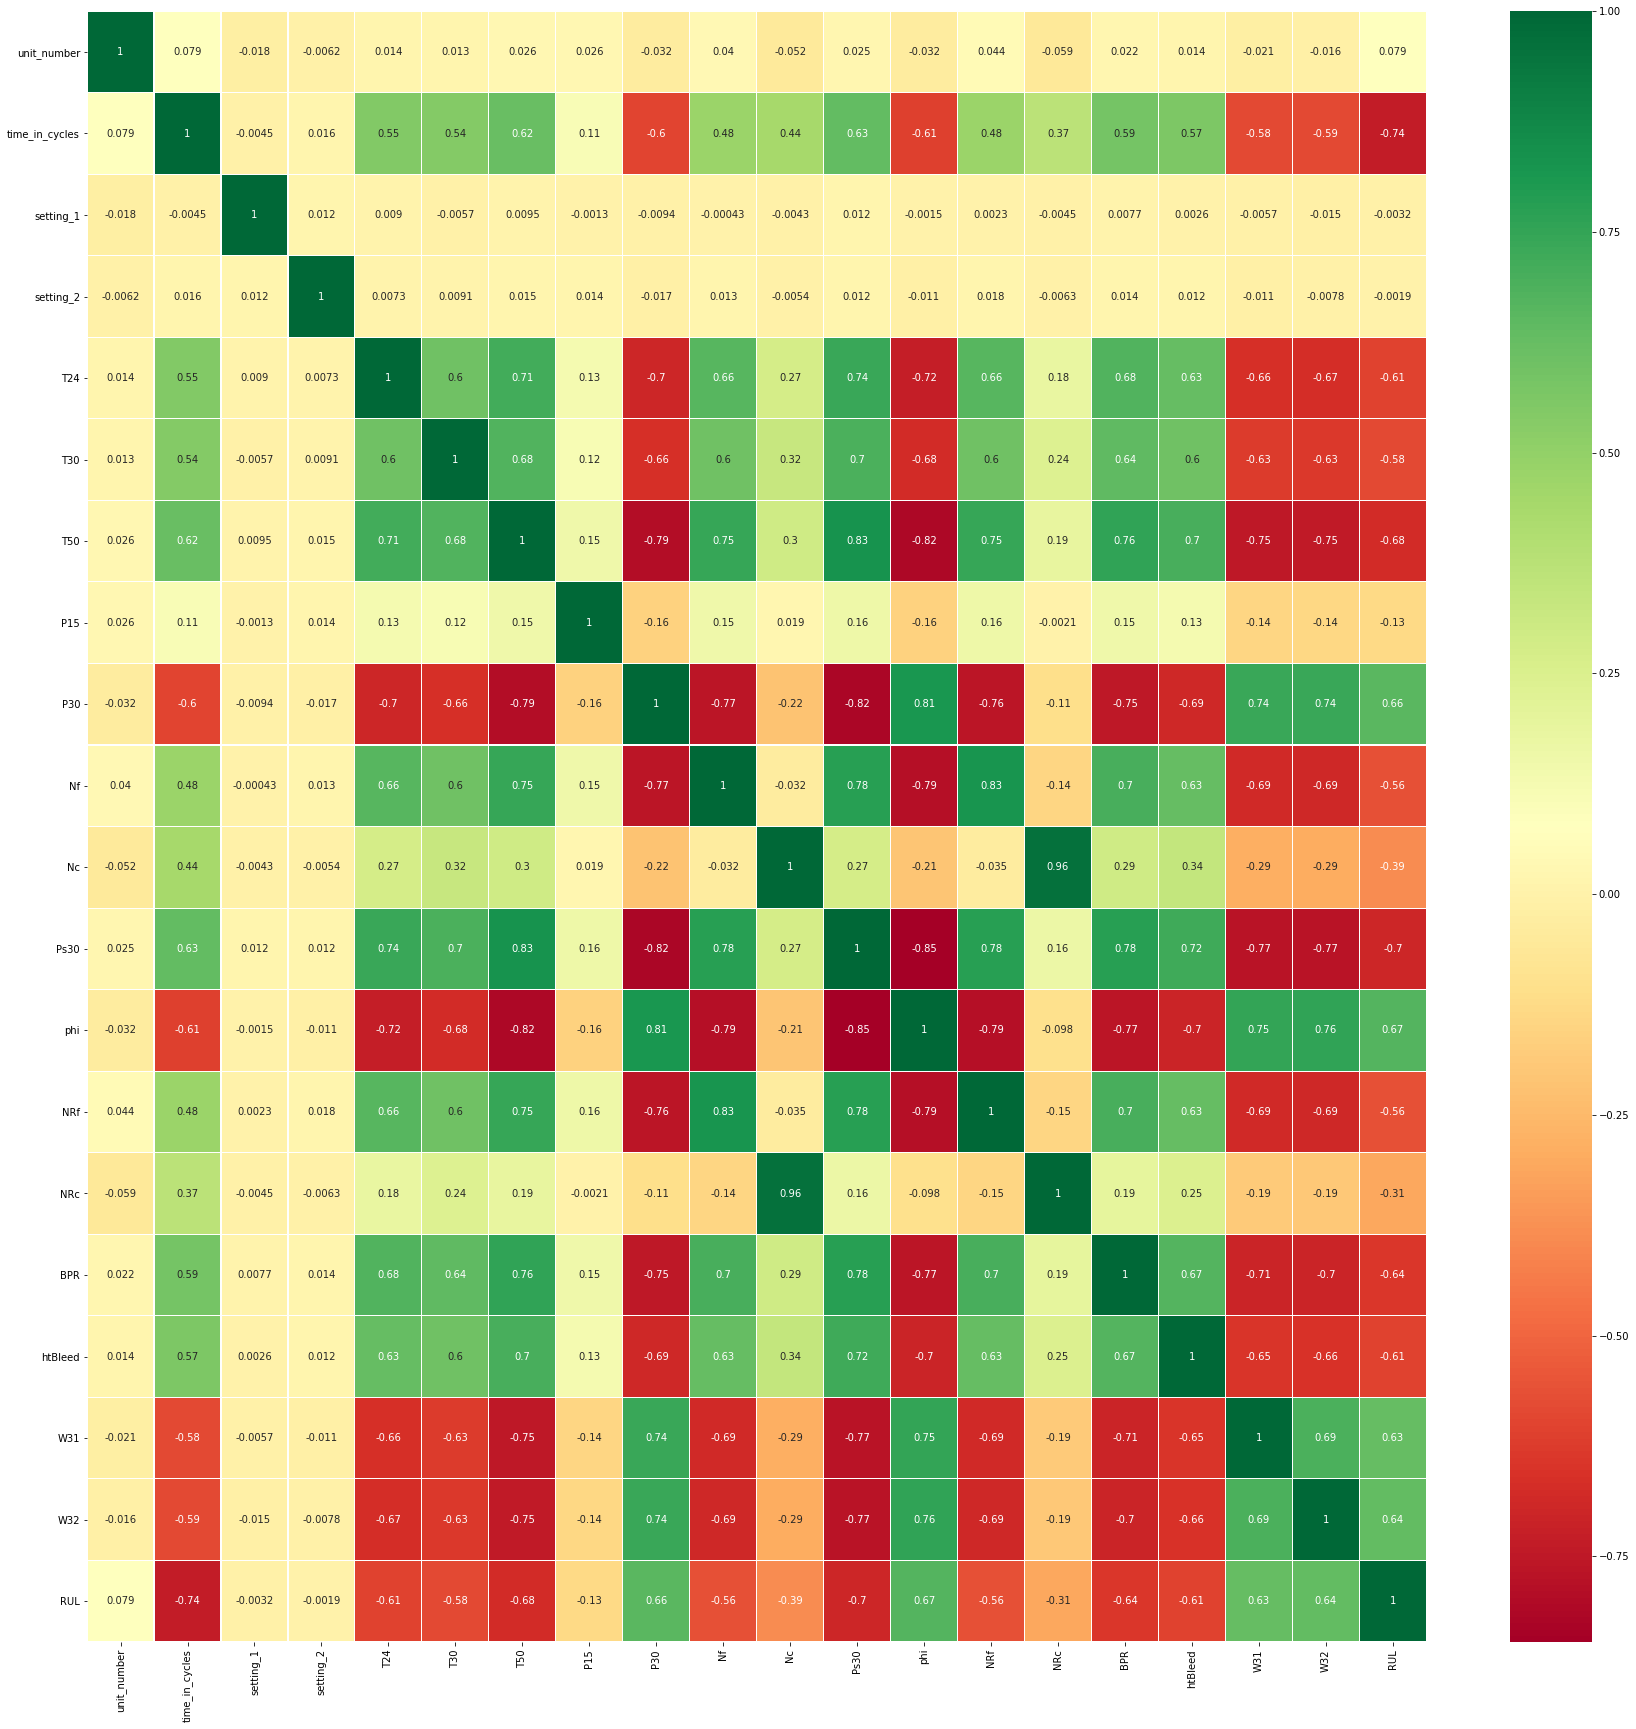

In [14]:
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn', linewidths = 0.1)
fig = plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [15]:
#Error Function : 

def score(y_true, y_pred, a1 = 10, a2 = 13):
    score = 0
    diff = y_pred - y_true
    for i in diff:
        if i >=0:
            score+= (math.exp(i/a2) - 1)
        else:
            score+= (math.exp(-i/a1) - 1)
    return score

In [16]:
def score_func(y_true, y_pred): 
    score_list = [round(score(y_true, y_pred), 2),
                  round(mean_absolute_error(y_true, y_pred), 2),
                  round(mean_squared_error(y_true, y_pred), 2)**0.5,
                  round(r2_score(y_true, y_pred),2)]
    print(f"Competitive Score : {score_list[0]}\n")
    print(f"Mean Absolute Error :  {score_list[1]}\n")
    print(f"Root Mean Squared Error :  {score_list[2]}\n")
    print(f"R-2 Score :  {score_list[3]}\n")
    return [score_list[1], round(score_list[2],2), score_list[3]*100]

Properties that are found to be weakly related with the RUL : setting_1, setting_2, P15, unit_number, as well as one of the features that are highly correlated with each other (Nc and NRc are found to have a high co-relation coefficient of 0.96 - therefore removeing NRc)

In [17]:
unit_number = pd.DataFrame(df["unit_number"])
train_df = df.drop(columns = ['unit_number', 'setting_1', 'setting_2', 'P15', 'NRc'])
train_df.head()

,time_in_cycles,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,BPR,htBleed,W31,W32,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


First Model to train for preliminary examination : LSTM
## LSTM : Long-Short Term Memory Model

Preprocessing Data for LSTM : 

In [18]:
def lstm_preprocessing(raw_train_data, raw_test_data, raw_RUL_data):
    train_df = raw_train_data
    truth_df = raw_RUL_data
    truth_df.drop(truth_df.columns[[1]], axis = 1, inplace = True)

    #TRAINING : 

    #Testing Binary Classification
    #Is the given engine going to fail within 'c1' cycles?

    c1 = 30
    c0 = 15
    train_df['label1'] = np.where(train_df['RUL'] <= c1, 1, 0)
    train_df['label2'] = train_df['label1']
    train_df.loc[train_df['RUL'] <= c0, 'label2'] = 2 

    #Min-Max Normalization(0 to 1) : 

    train_df['cycle_norm'] = train_df['time_in_cycles']
    cols_normalize = train_df.columns.difference(['unit_number', 'time_in_cycles', 'RUL', 'label1', 'label2'])

    #normalizing columns except ID, cycle, rul

    min_max_scaler = MinMaxScaler()
    norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), columns = cols_normalize, index = train_df.index)
    join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
    train_df = join_df.reindex(columns = train_df.columns)
    print("\n")

    #TESTING : 
    
    test_df = raw_test_data.drop(columns = ['unit_number', 'setting_1', 'setting_2', 'P15', 'NRc'])
    
    #Min-Max Normalization(0 to 1) : 

    test_df['cycle_norm'] = test_df['time_in_cycles']
    norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),columns = cols_normalize,index = test_df.index)
    test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
    test_df = test_join_df.reindex(columns = test_df.columns)
    test_df = test_df.reset_index(drop = True)

    ########

    #Using ground truth dataset to generate labels for the test data : 
    #Also generate column max for test data :

    rul = pd.DataFrame(test_df.groupby('unit_number')['time_in_cycles'].max()).reset_index()
    rul.columns = ['unit_number','max']
    truth_df.columns = ['more']
    truth_df['unit_number'] = truth_df.index + 1
    truth_df['max'] = rul['max'] + truth_df['more'] # adding true-rul value + max cycle of test data set w.r.t mid
    truth_df.drop('more', axis=1, inplace=True)

    # generate RUL for test data : 
    test_df = test_df.merge(truth_df, on=['unit_number'], how='left')
    test_df['RUL'] = test_df['max'] - test_df['time_in_cycles']
    test_df.drop('max', axis=1, inplace=True) 

    # generate label columns c0 and c1 for test data :
    test_df['label1'] = np.where(test_df['RUL'] <= c1, 1, 0 )
    test_df['label2'] = test_df['label1']
    test_df.loc[test_df['RUL'] <= c0, 'label2'] = 2
    print("test_df >> ", test_df.head())

    
    #Selecting a large window of 50 cycles : 
    sequence_length = 50

    #Function to reshape features into (samples, time steps, features) 
    def gen_sequence(id_df, seq_length, seq_cols):
        """Only sequences that meet the window-length are considered, no padding used. This means for testing
        we need to drop those which are below the window-length. An alternative would be to pad sequences so that
        we can use shorter ones."""
        #Putting all the rows with the same ID in a single matrix :
        data_matrix = id_df[seq_cols].values
        num_elements = data_matrix.shape[0]
        #Iterate over two lists in parallel.
        #For example id1 have 192 rows and sequence_length is equal to 50
        #so zip iterate over two following list of numbers (0,112),(50,192)
        #0 50 -> from row 0 to row 50
        #1 51 -> from row 1 to row 51
        #2 52 -> from row 2 to row 52
        #...
        #111 191 -> from row 111 to row 191
        for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
            yield data_matrix[start:stop, :]

    #Picking the feature columns 
    sequence_cols = list(test_df.columns[:-3])

    print(sequence_cols)
    
    #For debug :  
    #NOTE - val is a list of 192 - 50 = 142 bi-dimensional array (50 rows x 25 columns)
    val=list(gen_sequence(train_df[train_df['unit_number']==1], sequence_length, sequence_cols))
    print(len(val))

    #Generator for the sequences
    #Transform each id of the train dataset in a sequence
    seq_gen = (list(gen_sequence(train_df[train_df['unit_number']==id], sequence_length, sequence_cols)) 
               for id in train_df['unit_number'].unique())

    #Generating the sequences and converting them to numpy array : 
    seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
    print(seq_array.shape)

    #Function to generate labels : 
    def gen_labels(id_df, seq_length, label):
        """Only sequences that meet the window-length are considered, no padding is used. This means for testing
        we need to drop those which are below the window-length. An alternative would be to pad sequences so that
        we can use shorter ones."""
        #Putting all labels with the same ID into one matrix : 
     
        data_matrix = id_df[label].values
        num_elements = data_matrix.shape[0]
        #To remove : seq_length labels
        #Since for one ID, the first sequence of seq_length size have as target
        #The last label (the previous ones are discarded)
        #All the next ID's sequences will have associated step by step one label as target.
        return data_matrix[seq_length:num_elements, :]

    #Generating Labels : 
    label_gen = [gen_labels(train_df[train_df['unit_number']==id], sequence_length, ['RUL']) 
                 for id in train_df['unit_number'].unique()]

    label_array = np.concatenate(label_gen).astype(np.float32)
    print(label_array.shape)
    print(label_array)
    
    return seq_array, label_array, test_df, sequence_length, sequence_cols



# LSTM Modelling  

In [19]:
def r2_keras(y_true, y_pred):
    """Coefficient of Determination"""
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

def lstm_train(seq_array, label_array, sequence_length):
    #The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units. 
    #Dropout is also applied after each LSTM layer to control overfitting. 
    #Final layer is a Dense output layer with single unit and linear activation since this is a regression problem.
    nb_features = seq_array.shape[2]
    nb_out = label_array.shape[1]

    model = Sequential()
    model.add(LSTM(
             input_shape=(sequence_length, nb_features),
             units=100,
             return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(
              units=50,
              return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=nb_out))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae',r2_keras])

    print(model.summary())

    # fit the network # Commoly used 100 epoches but 50-60 are fine its an early cutoff 
    history = model.fit(seq_array, label_array, epochs=60, batch_size=200, validation_split=0.05, verbose=2)
    #callbacks = [keras.callbacks.EarlyStoping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
    # keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]

    # List all data in history : 
    print(history.history.keys())
    
    return model, history

Evaluating the model on Test Data : 

In [20]:
def lstm_test_evaluation_graphs(model, history, seq_array, label_array):
    # summarize history for R^2
    fig_acc = plt.figure(figsize=(10, 10))
    plt.plot(history.history['r2_keras'])
    plt.plot(history.history['val_r2_keras'])
    plt.title('model r^2')
    plt.ylabel('R^2')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # fig_acc.savefig("model_r2.png")

    # summarize history for MAE
    fig_acc = plt.figure(figsize=(10, 10))
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # fig_acc.savefig("model_mae.png")

    # summarize history for Loss
    fig_acc = plt.figure(figsize=(10, 10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # fig_acc.savefig("model_regression_loss.png")

    # training metrics
    scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
    print('\nMAE: {}'.format(scores[1]))
    print('\nR^2: {}'.format(scores[2]))

    y_pred = model.predict(seq_array,verbose=1, batch_size=200)
    y_true = label_array

    test_set = pd.DataFrame(y_pred )
    test_set.head()
    # test_set.to_csv('submit_train.csv', index = None)

Setting up function for Evaluation on Dev/Validation Set : 

In [21]:
def lstm_valid_evaluation(lstm_test_df, model, sequence_length, sequence_cols):
    # We pick the last sequence for each id in the test data
    seq_array_test_last = [lstm_test_df[lstm_test_df['unit_number']==id][sequence_cols].values[-sequence_length:] 
                           for id in lstm_test_df['unit_number'].unique() if len(lstm_test_df[lstm_test_df['unit_number']==id]) >= sequence_length]

    seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

    # Similarly, we pick the labels
    y_mask = [len(lstm_test_df[lstm_test_df['unit_number']==id]) >= sequence_length for id in lstm_test_df['unit_number'].unique()]
    label_array_test_last = lstm_test_df.groupby('unit_number')['RUL'].nth(-1)[y_mask].values
    label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

    estimator = model

    #Test Metrics
    scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
    print('\nMAE: {}'.format(scores_test[1]))
    print('\nR^2: {}'.format(scores_test[2]))

    y_pred_test = estimator.predict(seq_array_test_last)
    y_true_test = label_array_test_last

    test_set = pd.DataFrame(y_pred_test)
    print(test_set.head())

    # Plot in blue color the predicted data and in green color the
    # actual data to verify visually the accuracy of the model.
    fig_verify = plt.figure(figsize=(10, 5))
    plt.plot(y_pred_test)
    plt.plot(y_true_test, color="orange")
    plt.title('prediction')
    plt.ylabel('value')
    plt.xlabel('row')
    plt.legend(['predicted', 'actual data'], loc='upper left')
    plt.show()
    # fig_verify.savefig("model_regression_verify.png")
    return scores_test[1], scores_test[2]

In [22]:
#function for creating and training models using the "Random forest" and "XGBoost" algorithms
def train_models(data,model = 'FOREST'):
    
    if model != 'LSTM':
        X = data.iloc[:,:14].to_numpy() 
        Y = data.iloc[:,14:].to_numpy()
        Y = np.ravel(Y)

    if model == 'FOREST':
         #  parameters for models are selected in a similar cycle, with the introduction 
         # of an additional param parameter into the function:
         #for i in range(1,11):
         #     xgb = train_models(train_df,param=i,model="XGB",)
         #     y_xgb_i_pred = xgb.predict(X_001_test)
         #     print(f'param = {i}')
         #     score_func(y_true,y_xgb_i_pred)
        model = RandomForestRegressor(n_estimators=70, max_features=7, max_depth=5, n_jobs=-1, random_state=1)
        model.fit(X,Y)
        return model
    
    elif model == 'XGB':
        model = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.018, gamma=0, subsample=0.8,
                           colsample_bytree=0.5, max_depth=3,silent=True)
        model.fit(X,Y)
        return model
    
    elif model == 'LSTM':
        seq_array, label_array, lstm_test_df, sequence_length, sequence_cols = lstm_preprocessing(data[0], data[1], data[2])
        model_instance, history = lstm_train(seq_array, label_array, sequence_length)
        return model_instance, history, lstm_test_df, seq_array, label_array, sequence_length, sequence_cols
            
    return

In [23]:
#function for joint display of real and predicted values

def plot_result(y_true,y_pred):
    rcParams['figure.figsize'] = 12,10
    plt.plot(y_pred)
    plt.plot(y_true)
    plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
    plt.ylabel('RUL')
    plt.xlabel('training samples')
    plt.legend(('Predicted', 'True'), loc='upper right')
    plt.title('COMPARISION OF Real and Predicted values')
    plt.show()
    return


## Prepare test data for classification
Only the features used in the training are needed and a line with the maximum value for this engine time_in_cycles (last)


In [24]:
test_FD001.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
test_max = test_FD001.groupby('unit_number')['time_in_cycles'].max().reset_index()
test_max.columns = ['unit_number', 'max']

test_FD001 = test_FD001.merge(test_max, on = ['unit_number'], how = 'left')

In [25]:
test1 = test_FD001[test_FD001['time_in_cycles'] == test_FD001['max']].reset_index()

test1.drop(columns=['index','max','unit_number','setting_1','setting_2','P15','NRc'], inplace = True)

In [26]:
X_001_test = test1.to_numpy()

In [27]:
X_001_test.shape

(100, 14)

In [28]:
test_FD001.head()

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,max
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31



## Prediction of the final result for all engines
Let's train the model on training data without the deleted properties 'unit_number', 'setting_1', 'setting_2', 'P15', 'NRc'

In [29]:
model_1 = train_models(train_df)

In [30]:
y_pred = model_1.predict(X_001_test)

In [31]:
RUL = pd.read_csv("/home/yash/projects/prognostics_thesis/CMAPSSData/RUL_FD001.txt",sep=" ",header=None)

In [32]:
y_true = RUL[0].to_numpy()

In [33]:
RUL.head

<bound method NDFrame.head of       0   1
0   112 NaN
1    98 NaN
2    69 NaN
3    82 NaN
4    91 NaN
..  ...  ..
95  137 NaN
96   82 NaN
97   59 NaN
98  117 NaN
99   20 NaN

[100 rows x 2 columns]>

In [34]:
RF_individual_scorelst = score_func(y_true, y_pred)

Competitive Score : 1057.2

Mean Absolute Error :  19.25

Root Mean Squared Error :  24.45219826518671

R-2 Score :  0.65



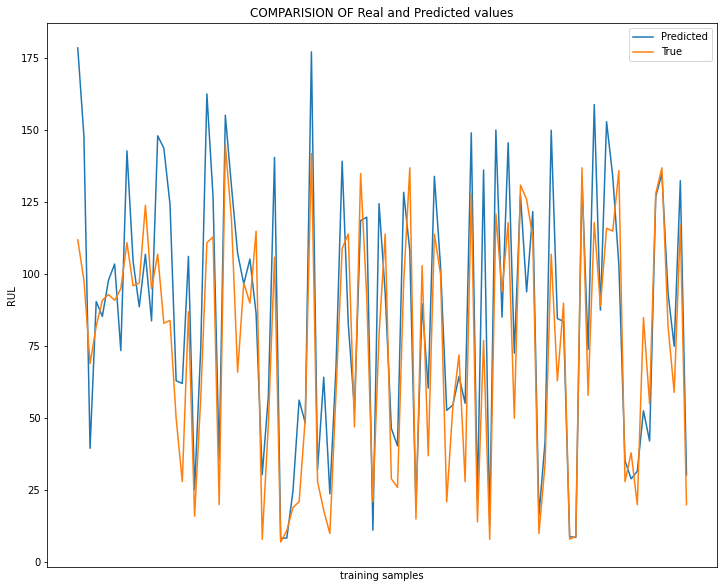

In [35]:
plot_result(y_true,y_pred)

In [36]:
train_df_lstm = pd.concat([unit_number, train_df], axis=1)

In [37]:
model, history, lstm_test_df, seq_array, label_array, sequence_length, sequence_cols = train_models([train_df_lstm, test_FD001, RUL.copy()], "LSTM")

KeyError: 'unit_number'

In [38]:
|

SyntaxError: invalid syntax (<ipython-input-38-4b37ef281455>, line 1)